In [1]:
import pandas as pd
import numpy as np

In [2]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from wordcloud import WordCloud

In [3]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', 50) #None으로 설정하면 모든 행 출력

# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', None) #None으로 설정하면 모든 내용을 출력

In [4]:
# 정규화
import re

In [5]:
# 날짜는 파이썬 표준 라이브러리 datetime 사용
import datetime
# 오늘 날짜 가져오기
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
today

2024-12-27 16:48:40.029683


'2024-12-27'

In [6]:
df = pd.read_csv(f'news_{today}.csv')
df.head(1)

,언론사,제목,내용,작성일시
0,매일경제,‘오징어게임2’ 외신 혹평에...테마주 동반 폭락,"\n 사진 확대 ‘오징어 게임2’. 제공|넷플릭스 전 세계적 기대작 넷플릭스 ‘오징어 게임2’가 공개된 다음 날인 27일 장 초반 관련 종목들이 급락하고 있다.이날 오전 9시 20분 현재 아티스트스튜디오(200350)가 26.68% 급락 중이며, 아티스트유나이티드(321820)도 23.98% 하락하고 있다.아티스트스튜디오와 아티스트유나이티드는 시즌1에 이어 ‘오징어게임2’에서도 주연을 맡은 배우 이정재가 대주주로 있는 기업이다.또 ‘오징어게임2’의 영상 특수효과를 맡은 위지윅스튜디오(299900)는 20.00% 하락했고, 덱스터(206560)는 18.59% 내려 거래되고 있다.‘오징어게임’ 제작사인 싸이런픽쳐스에 투자한 쇼박스(086980)도 14.97% 급락을 면치 못하고 있다.지난 2021년 9월 공개돼 전 세계적으로 폭발적인 인기를 얻었던 ‘오징어 게임’의 후속작인 ‘오징어 게임2’는 지난 26일 오후 5시(한국시간) 넷플릭스를 통해 공개됐다.큰 기대 속에 베일을 벗은 ‘오징어게임2’에 대해 해외 주요 매체들은 “이야기가 정체돼있다’”, “날카로움을 잃었다”, “재미도 기발함도 없다”는 등 첫 시즌에 비해 실망스럽다는 반응을 보이고 있다.국내 시청자들도 대체로 시즌1만 못하다는 반응을 보이고 있으며 특히 그룹 빅뱅 출신 탑(최승현)의 오글거리는 연기에 혹평을 보내고 있다.시즌2에 이어지는 ‘오징어게임3’가 내년에 공개된다.\n",2024-12-27 09:38:05


#### CountVectorizer


- 텍스트 데이터 전처리 도구로, 주로 텍스트 데이터를 수치형 데이터로 변환하는 데 사용
- 단어의 빈도를 계산하여 문서-단어 행렬(Document-Term Matrix)을 생성

1. 토큰화(Tokenization):
    - 기본적으로 CountVectorizer는 공백을 기준으로 단어를 나눔
2. 정규 표현식 사용:
    - token_pattern 매개변수를 사용하여 정규 표현식을 정의할 수 있음. 이를 통해 특정 패턴에 맞는 단어만 추출
3. 불용어 제거:
    - stop_words 매개변수를 사용하여 불용어(의미가 없는 단어)를 제거
4. n-그램(n-grams):
    - ngram_range 매개변수를 사용하여 단어의 n-그램을 생성할 수 있음. 예를 들어, ngram_range=(1, 2)로 설정하면 단어와 2-그램(두 단어 조합)을 모두 포함
5. 소문자 변환:
    - 기본적으로 CountVectorizer는 모든 단어를 소문자로 변환하여 대소문자를 구분하지 않음


In [10]:
corpus = df['제목']
corpus

0              ‘오징어게임2’ 외신 혹평에...테마주 동반 폭락
1        주가는 뒷걸음질인데 외국인은 산다?…‘게임주’에 쏠리는 시선
2       두산에너빌리티, 국제핵비확산협력센터와 원전 수출 사업지원 협약
3           “삼성전자, ‘이것’ 갖춰야 주가 반등 가능”…목표가↓
4     “SOOP, 내년도 실적에 주목해야 할 때…서서히 매수 관점으로”
                      ...                 
95            코스피·코스닥 상승 출발…원·달러 환율 1458원대
96           젠큐릭스, 자회사 지분 팔아 현금 확보 소식에 '上'
97    "TKG휴켐스, 내년 상반기까지 실적 반등 어려워…목표가↓"-DB
98     국내 정세불안, 항공업 영향 제한적 …"대한항공 최선호주"-한국
99     "중국 경기 부양 의지 확인…화장품·섬유의복 저점 매수 나서야"
Name: 제목, Length: 100, dtype: object

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
CountVectorizer?

Init signature:
CountVectorizer(
    *,
    input='content',
    encoding='utf-8',
    decode_error='strict',
    strip_accents=None,
    lowercase=True,
    preprocessor=None,
    tokenizer=None,
    stop_words=None,
    token_pattern='(?u)\\b\\w\\w+\\b',
    ngram_range=(1, 1),
    analyzer='word',
    max_df=1.0,
    min_df=1,
    max_features=None,
    vocabulary=None,
    binary=False,
    dtype=<class 'numpy.int64'>,
)
Docstring:     
Convert a collection of text documents to a matrix of token counts.

This implementation produces a sparse representation of the counts using
scipy.sparse.csr_matrix.

If you do not provide an a-priori dictionary and you do not use an analyzer
that does some kind of feature selection then the number of features will
be equal to the vocabulary size found by analyzing the data.

For an efficiency comparison of the different feature extractors, see
:ref:`sphx_glr_auto_examples_text_plot_hashing_vs_dict_vectorizer.py`.

Read more in the :ref:`User Guide


#### 매개 변수

- analyzer : 단어, 문자 단위의 벡터화 방법 정의
- ngram_range : BOW 단위 수 (1, 3) 이라면 1개~3개까지 토큰을 묶어서 벡터화
- max_df : 어휘를 작성할 때 문서 빈도가 주어진 임계값보다 높은 용어(말뭉치 관련 불용어)는 제외 (기본값=1.0)
  - max_df = 0.90 : 문서의 90% 이상에 나타나는 단어 제외
  - max_df = 10 : 10개 이상의 문서에 나타나는 단어 제외
- min_df : 어휘를 작성할 때 문서 빈도가 주어진 임계값보다 낮은 용어는 제외합니다. 컷오프라고도 합니다.(기본값=1.0)
  - min_df = 0.01 : 문서의 1% 미만으로 나타나는 단어 제외
  - min_df = 10 : 문서에 10개 미만으로 나타나는 단어 제외
- stop_words : 불용어 정의
- max_features : 벡터라이저가 학습할 어휘의 양을 제한, corpus중 빈도가 가장 높은 순으로 해당 개수만큼만 추출


In [13]:
# 공백을 중심으로 토큰화하고, 빈도수 확인
cvect = CountVectorizer(max_df=5,min_df=2, ngram_range=(1,2))

#### fit, transform, fit_transfrom의 차이점
- fit(): 원시 문서에 있는 모든 토큰의 어휘 사전을 배웁니다.
- transform(): 문서를 문서 용어 매트릭스로 변환합니다. transform 이후엔 매트릭스로 변환되어 숫자형태로 변경됩니다.
- fit_transform(): 어휘 사전을 배우고 문서 용어 매트릭스를 반환합니다.
fit 다음에 변환이 오는 것과 동일하지만 더 효율적으로 구현됩니다.


In [14]:
X = cvect.fit_transform(corpus)
X

<100x115 sparse matrix of type '<class 'numpy.int64'>'
	with 268 stored elements in Compressed Sparse Row format>

In [15]:
# 단어사전 확인
# 단어사전은 {'단어' : 인덱스번호 }
cvect.vocabulary_

{'오징어게임2': 59,
 '혹평에': 109,
 '테마주': 95,
 '혹평에 테마주': 110,
 '주가는': 80,
 '외국인은': 62,
 '게임주': 15,
 '삼성전자': 45,
 '주가': 78,
 '반등': 40,
 '목표가': 39,
 '주가 반등': 79,
 '알리': 55,
 'g마켓': 6,
 '키워': 94,
 '현대차': 108,
 '단독': 28,
 '신세계': 53,
 '맞손': 37,
 '규모': 20,
 '단독 신세계': 29,
 '젠큐릭스': 74,
 '넵튠': 25,
 'hd현대중공업': 7,
 '대신': 32,
 '프리미엄': 101,
 '독자노선': 34,
 '전기차': 70,
 '수혜': 51,
 '매도': 38,
 'jkl파트너스': 8,
 '8000억': 3,
 '펀드': 100,
 '설립': 47,
 'jkl파트너스 8000억': 9,
 '외국인': 61,
 '자금': 67,
 '지마켓': 85,
 '김병환': 23,
 '밸류업': 42,
 '김병환 밸류업': 24,
 '합작': 106,
 '체결': 87,
 '주식': 82,
 '초고수는': 88,
 '지금': 84,
 '주식 초고수는': 83,
 '초고수는 지금': 89,
 '올해': 60,
 '가장': 13,
 '종목은': 76,
 '엔비디아': 58,
 '종목은 엔비디아': 77,
 '강세': 14,
 '대신파이낸셜그룹': 33,
 '괴산군': 19,
 '성금': 48,
 '전달': 71,
 '성금 전달': 49,
 '금융위': 21,
 '러브콜': 35,
 '받은': 41,
 '토스증권': 96,
 'mbk': 10,
 '고려아연': 17,
 'mbk 고려아연': 11,
 '이정재': 65,
 '3년째': 2,
 '다시': 27,
 '하락': 102,
 '전환': 73,
 '하락 전환': 103,
 'mk시그널': 12,
 '공급': 18,
 '소식에': 50,
 '한화오션': 105,
 'etf': 5,
 '상장': 46,
 '이후': 66,
 '시장'

In [16]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
cvect.get_feature_names_out()

array(['1460원', '2기', '3년째', '8000억', 'cj대한통운', 'etf', 'g마켓', 'hd현대중공업',
       'jkl파트너스', 'jkl파트너스 8000억', 'mbk', 'mbk 고려아연', 'mk시그널', '가장', '강세',
       '게임주', '고객사', '고려아연', '공급', '괴산군', '규모', '금융위', '기회', '김병환',
       '김병환 밸류업', '넵튠', '뉴욕증시', '다시', '단독', '단독 신세계', '달러', '달러 환율', '대신',
       '대신파이낸셜그룹', '독자노선', '러브콜', '마켓pro', '맞손', '매도', '목표가', '반등', '받은',
       '밸류업', '본격화', '산타랠리', '삼성전자', '상장', '설립', '성금', '성금 전달', '소식에',
       '수혜', '시장', '신세계', '실적', '알리', '알리바바와', '어려워', '엔비디아', '오징어게임2',
       '올해', '외국인', '외국인은', '이마트', '이어', '이정재', '이후', '자금', '자회사', '장중',
       '전기차', '전달', '전망', '전환', '젠큐릭스', '조정', '종목은', '종목은 엔비디아', '주가',
       '주가 반등', '주가는', '주목', '주식', '주식 초고수는', '지금', '지마켓', '지분', '체결',
       '초고수는', '초고수는 지금', '최고가', '출시', '코스닥 상장', '코스피 코스닥', '키워', '테마주',
       '토스증권', '투자', '트럼프', '트럼프 2기', '펀드', '프리미엄', '하락', '하락 전환', '한국',
       '한화오션', '합작', '해외', '현대차', '혹평에', '혹평에 테마주', '혼조', '확보', '환율 장중',
       '획득'], dtype=object)

In [18]:
cvect.get_feature_names_out().size

115

In [19]:
# n번 등장한 단어는 n, 아닌 단어는 0
tmp = pd.DataFrame(X.toarray(), columns = cvect.get_feature_names_out())

In [20]:
tmp.head(2)

,1460원,2기,3년째,8000억,cj대한통운,etf,g마켓,hd현대중공업,jkl파트너스,jkl파트너스 8000억,mbk,mbk 고려아연,mk시그널,가장,강세,게임주,고객사,고려아연,공급,괴산군,규모,금융위,기회,김병환,김병환 밸류업,넵튠,뉴욕증시,다시,단독,단독 신세계,달러,달러 환율,대신,대신파이낸셜그룹,독자노선,러브콜,마켓pro,맞손,매도,목표가,반등,받은,밸류업,본격화,산타랠리,삼성전자,상장,설립,성금,성금 전달,소식에,수혜,시장,신세계,실적,알리,알리바바와,어려워,엔비디아,오징어게임2,올해,외국인,외국인은,이마트,이어,이정재,이후,자금,자회사,장중,전기차,전달,전망,전환,젠큐릭스,조정,종목은,종목은 엔비디아,주가,주가 반등,주가는,주목,주식,주식 초고수는,지금,지마켓,지분,체결,초고수는,초고수는 지금,최고가,출시,코스닥 상장,코스피 코스닥,키워,테마주,토스증권,투자,트럼프,트럼프 2기,펀드,프리미엄,하락,하락 전환,한국,한화오션,합작,해외,현대차,혹평에,혹평에 테마주,혼조,확보,환율 장중,획득
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
tmp.sum().sort_values(ascending=False)

목표가     5
삼성전자    4
3년째     4
밸류업     4
주가      4
       ..
본격화     2
받은      2
매도      2
맞손      2
획득      2
Length: 115, dtype: int64

In [22]:
# 모델을 받아서 변환후 문서-어휘 행렬로 반환하는 함수

def display_transform_dtm(cvect, corpus) : 
    '''
    모델을 받아 변환하고 문서-어휘 행렬을 반환하는 함수
    '''

    X = cvect.fit_transform(corpus)
    dtm = X.toarray()
    df_dtm = pd.DataFrame(dtm, columns = cvect.get_feature_names_out()).style.background_gradient()
    return df_dtm


In [ ]:
display_transform_dtm(cvect, corpus)

In [ ]:
# ngram_range(2,3)
cvect = CountVectorizer(ngram_range=(2,3))
display_transform_dtm(cvect, corpus)

#### TF- IDF(Term Frequency-Inverse Document Frequency)
- TF : 특정한 단어가 문서 내에 얼마나 자주 등장하는지를 나타내는 값. 자주 등장하는 단어는 중요도가 높다고 가정, 문서군에 자주 사용 되는경우 DF라고 함 
- IDF : 특정 단어가 전체 문서 집합에서 얼마나 중요한지를 평가. 자주 등장하는 단어는 중요도가 낮고, 드물게 등장하는 단어는 중요도가 높다고 가정
- TF-IDF : TF와 IDF를 곱한값
- 가중치를 주는개념

#### TfidfVectorizer
- CountVectorizer와 TfidfTransformer를 합쳐놓은 것
- 문서 모음을 TF-IDF 매트릭스로 변환
- 

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
tfidfvect = TfidfVectorizer()
X = tfidfvect.fit(corpus).transform(corpus)  # tfidfvect.fit_transform(corpus)와 동일
X

<100x613 sparse matrix of type '<class 'numpy.float64'>'
	with 780 stored elements in Compressed Sparse Row format>

In [27]:
# 문서에 토큰이 더 많이 나타날수록 가중치는 더 커진다 TF
# 그러나 토큰이 여러문서에 많이 표시될수록 가중치는 감소 IDF
dtm = X.toarray()
dtm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
display_transform_dtm(tfidfvect, corpus)

In [ ]:
tfidfvect.idf_

In [ ]:
vocab = tfidfvect.get_feature_names_out()
idf_dict = dict(zip(vocab, tfidfvect.idf_))
idf_dict

In [ ]:
pd.Series(idf_dict).nlargest(30).to_frame().style.background_gradient()

<Axes: >

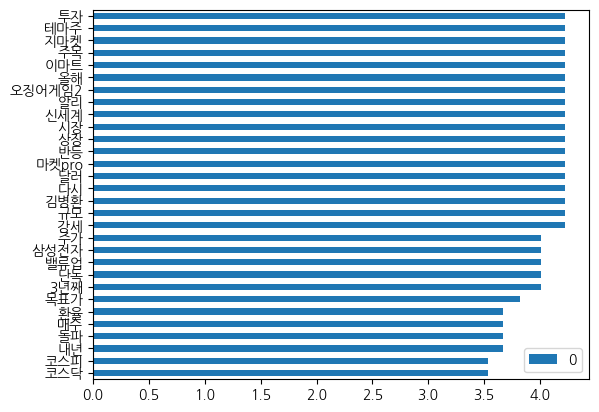

In [36]:
pd.Series(idf_dict).nsmallest(30).to_frame().plot.barh()

In [ ]:
tfidfvect = TfidfVectorizer(ngram_range=(3,4), max_df = 0.9, min_df = 1)
display_transform_dtm(tfidfvect, corpus)

#### 문제
- 금일 증권 뉴스를 수집하여 CountVectorizer(빈도), TfidfVectorizer(중요도)를 사용하여 상위 키워드 30개를 각각 워드 클라우드로 시각화해서 비교해보기

- WordCloud().generate_from_frequencies({어휘:값})

- 고려사항 : 전처리(형태소추출, 불용어처리 등)

In [37]:
df.head(1)

,언론사,제목,내용,작성일시
0,매일경제,‘오징어게임2’ 외신 혹평에...테마주 동반 폭락,"\n 사진 확대 ‘오징어 게임2’. 제공|넷플릭스 전 세계적 기대작 넷플릭스 ‘오징어 게임2’가 공개된 다음 날인 27일 장 초반 관련 종목들이 급락하고 있다.이날 오전 9시 20분 현재 아티스트스튜디오(200350)가 26.68% 급락 중이며, 아티스트유나이티드(321820)도 23.98% 하락하고 있다.아티스트스튜디오와 아티스트유나이티드는 시즌1에 이어 ‘오징어게임2’에서도 주연을 맡은 배우 이정재가 대주주로 있는 기업이다.또 ‘오징어게임2’의 영상 특수효과를 맡은 위지윅스튜디오(299900)는 20.00% 하락했고, 덱스터(206560)는 18.59% 내려 거래되고 있다.‘오징어게임’ 제작사인 싸이런픽쳐스에 투자한 쇼박스(086980)도 14.97% 급락을 면치 못하고 있다.지난 2021년 9월 공개돼 전 세계적으로 폭발적인 인기를 얻었던 ‘오징어 게임’의 후속작인 ‘오징어 게임2’는 지난 26일 오후 5시(한국시간) 넷플릭스를 통해 공개됐다.큰 기대 속에 베일을 벗은 ‘오징어게임2’에 대해 해외 주요 매체들은 “이야기가 정체돼있다’”, “날카로움을 잃었다”, “재미도 기발함도 없다”는 등 첫 시즌에 비해 실망스럽다는 반응을 보이고 있다.국내 시청자들도 대체로 시즌1만 못하다는 반응을 보이고 있으며 특히 그룹 빅뱅 출신 탑(최승현)의 오글거리는 연기에 혹평을 보내고 있다.시즌2에 이어지는 ‘오징어게임3’가 내년에 공개된다.\n",2024-12-27 09:38:05


In [ ]:
def display_word_cloud(str, max_words=30, width=1200,height=600) : 

    # r스트링 쓰는이유 : \ 를 특별한 의미로 해석하지말고 평범한 하나의 문자로 해석하게 하기위함
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    stopwords = ['코스피','코스닥','종목','ETF','주식','주가','올해','내년','상장','시총','상승','하락','국내','해외','외국인','투자','서학','동학','소식에','기대감','기업','시장','목표가']
    word_cloud = WordCloud(font_path = font_path,
              width=width,
              height=height,
              stopwords=stopwords,
              background_color='white',
              min_word_length = 2,
              max_words = max_words,
              random_state=2024).generate(str)
    plt.imshow(word_cloud)
    plt.show()
    return word_cloud

In [ ]:
corpus_content = df['내용']
corpus_content

In [95]:
# 공백을 중심으로 토큰화하고, 빈도수 확인
stop_words = ['fi'] 
cvect_content = CountVectorizer(max_df=5,min_df=2, ngram_range=(1,2),stop_words=stop_words)

In [96]:
cvect_content

CountVectorizer(max_df=5, min_df=2, ngram_range=(1, 2), stop_words=['fi'])

In [97]:
X_content = cvect_content.fit_transform(corpus_content)

In [ ]:
cvect_content.vocabulary_

In [43]:
 cvect_content_list = cvect_content.get_feature_names_out()

In [108]:
# 모델을 받아서 변환후 문서-어휘 행렬로 반환하는 함수

def display_transform_dtm(cvect, corpus) : 
    '''
    모델을 받아 변환하고 문서-어휘 행렬을 반환하는 함수
    '''

    X = cvect.fit_transform(corpus)
    print(cvect.get_feature_names_out())  # 어휘사전 출력
    dtm = X.toarray()
    df_dtm = pd.DataFrame(dtm, columns = cvect.get_feature_names_out())
    return df_dtm

In [99]:
df_dtm_content = display_transform_dtm(cvect_content, corpus_content)

['01' '01 3조4400억원에' '02' ... '힘을' '힘입어 12월' '힘입어 24일']


In [100]:
type(df_dtm_content)

pandas.core.frame.DataFrame

In [101]:
dtm_top_30_dict = dict(df_dtm_content.sum().sort_values(ascending=False).head(30))

In [102]:
dtm_top_30_dict

{'외국인': 25,
 '11번가': 21,
 '전기차': 20,
 '고려아연': 17,
 'mk시그널': 16,
 '상장한': 15,
 '기아': 13,
 '신세계그룹': 12,
 '오징어': 12,
 '환율이': 12,
 '전자상거래': 12,
 '인도': 12,
 '종가': 11,
 '전기차 충전기': 11,
 '원화값이': 11,
 '온라인': 11,
 '충전기': 11,
 '토스증권': 11,
 '선박': 11,
 '부동산': 11,
 '신세계': 10,
 '성장': 10,
 '유지': 10,
 '방안을': 10,
 '달러당': 10,
 '기업에': 10,
 '경영권': 10,
 '순매수했다': 10,
 '세제': 10,
 '해양': 10}

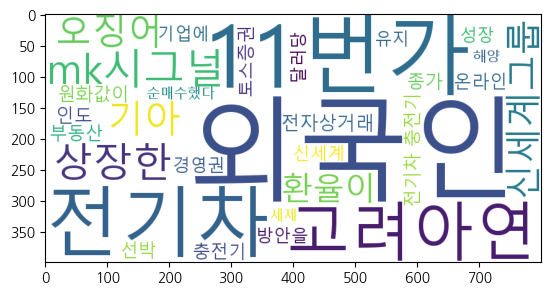

In [103]:
word_cloud = WordCloud(font_path=r'C:\Windows\Fonts\malgun.ttf',
                       width=800,
                       height=400,
                       background_color='white',
                       min_word_length = 2,
                       random_state=2024)
word_cloud.generate_from_frequencies(dtm_top_30_dict)
plt.imshow(word_cloud)
plt.show()

In [72]:
from konlpy.tag import Okt
okt = Okt()

In [73]:
from tqdm import tqdm
tqdm.pandas()

In [74]:
df['내용_명사'] = df['내용'].progress_map(lambda x : ' '.join(okt.nouns(x)))

100%|██████████| 100/100 [00:07<00:00, 12.99it/s]


In [ ]:
corpus_content_nouns = df['내용_명사']
corpus_content_nouns

In [76]:
cvect_content_nouns = CountVectorizer(max_df=5,min_df=2, ngram_range=(1,2))

In [78]:
X_content_nouns = cvect_content_nouns.fit_transform(corpus_content_nouns)
X_content_nouns

<100x3123 sparse matrix of type '<class 'numpy.int64'>'
	with 7896 stored elements in Compressed Sparse Row format>

In [79]:
df_dtm_content_nouns = display_transform_dtm(cvect_content_nouns, corpus_content_nouns)

['가격 경쟁' '가격 경쟁력' '가격 교란' ... '흐름 전망' '흑자' '흥행']


In [ ]:
df_dtm_content_nouns

In [81]:
dtm_nouns_top_30_dict = dict(df_dtm_content_nouns.sum().sort_values(ascending=False).head(30))

In [83]:
dtm_nouns_top_30_dict

{'아티스트': 29,
 '시그널': 28,
 '번가': 28,
 '오징어': 27,
 '오징어 게임': 27,
 '고려아연': 25,
 '외국인 투자자': 25,
 '전기차': 24,
 '세제': 23,
 '아티스트 유나이티드': 18,
 '현대차 기아': 18,
 '스퀘어': 18,
 '유나이티드': 18,
 '매각': 17,
 '커뮤니티': 17,
 '인도': 16,
 '시즌': 16,
 '간담': 15,
 '통운': 15,
 '세제 지원': 15,
 '휴맥스': 15,
 '신규 상장': 15,
 '메모리': 15,
 '부동산': 14,
 '투자자 매수': 14,
 '부채': 14,
 '위원장': 14,
 '확산': 14,
 '토스': 14,
 '감사': 14}

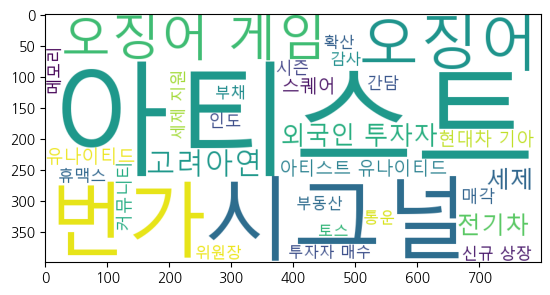

In [82]:
# 오늘자 기사 
word_cloud = WordCloud(font_path=r'C:\Windows\Fonts\malgun.ttf',
                       width=800,
                       height=400,
                       background_color='white',
                       min_word_length = 2,
                       random_state=2024)
word_cloud.generate_from_frequencies(dtm_nouns_top_30_dict)
plt.imshow(word_cloud)
plt.show()

In [104]:
tfidfvect = TfidfVectorizer()
X_tfidf_content = tfidfvect.fit_transform(corpus_content)

In [105]:
dtm_tfidf_content = X_tfidf_content.toarray()

In [110]:
df_dtm_tfidf_content= display_transform_dtm(tfidfvect, corpus_content)

['00' '000원' '000원에' ... '힘쓰고' '힘을' '힘입어']


In [ ]:
df_dtm_tfidf_content

In [112]:
df_dtm_tfidf_content_top_30_dict = dict(df_dtm_tfidf_content.sum().sort_values(ascending=False).head(30))

In [114]:
df_dtm_tfidf_content_top_30_dict

{'있다': 4.158274574444082,
 '것으로': 2.4694590321964047,
 '대비': 2.147463507193408,
 '밸류업': 2.068703496241403,
 '국내': 2.014401789016581,
 '사진': 1.982455991044553,
 '지난': 1.892754548179447,
 '통해': 1.8037285786674218,
 '내년': 1.7341871038653665,
 '올해': 1.7146976372076321,
 '미국': 1.7034153120943074,
 '26일': 1.676623496833461,
 '확대': 1.6530927339972448,
 '기업': 1.6044398385802914,
 '이후': 1.5837060847455218,
 '글로벌': 1.5400772388880077,
 '이라고': 1.5172714180666556,
 '기자': 1.5128727399459487,
 '연구원은': 1.4921992232396906,
 '했다': 1.4389437694042173,
 '코스닥': 1.4288699535585456,
 '있는': 1.4090509426096978,
 '이날': 1.4006328332771305,
 '오른': 1.368852651845429,
 '투자': 1.3660957322883882,
 'com': 1.3413455616044414,
 'hankyung': 1.3413455616044414,
 '기준': 1.3262273090350576,
 '현재': 1.2965344041479412,
 '주가가': 1.2657595104824921}

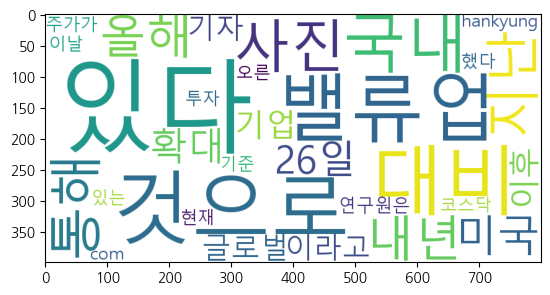

In [113]:
word_cloud = WordCloud(font_path=r'C:\Windows\Fonts\malgun.ttf',
                       width=800,
                       height=400,
                       background_color='white',
                       min_word_length = 2,
                       random_state=2024)
word_cloud.generate_from_frequencies(df_dtm_tfidf_content_top_30_dict)
plt.imshow(word_cloud)
plt.show()

In [ ]:
vocab = tfidfvect.get_feature_names_out()
idf_dict = dict(zip(vocab, tfidfvect.idf_))
idf_dict

In [107]:
idf_dict.head(30)

AttributeError: 'dict' object has no attribute 'head'